## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

  *redes neuronales convolucionales (es el mas sencillo de los 4 dataset)



  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps


  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners


  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz
  


Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

##Contexto##



Realizaremos el Proyecto 7 basándonos en el dataset "Estadísticas demográficas de los ganadores del premio Oscar de la Academia", el cual contiene información de los ganadores de este prestigioso galardón desde su primera edición, considerando algunas categorías como objeto de análisis.

In [2]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing   import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/drive


In [3]:
# Importar datos
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/Oscars-demographics-DFE.csv', encoding='ISO-8859-1')

##Limpieza y EDA##

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

- Las columnas que tiene agregado el texto ":confidence" indican la confianza en la precisón de la información.

In [6]:
df.shape

(441, 27)

- Nuestro dataset tiene 441 registros y 27 variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

In [8]:
#Describe columnas numericas
df.describe()

,_unit_id,_trusted_judgments,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,year_of_award_gold
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,11.000000
mean,6.704825e+08,7.637188,0.995259,0.996607,0.999130,0.989373,0.992390,1973.165533,0.990082,1977.363636
std,1.139974e+05,19.015541,0.038917,0.032060,0.016438,0.065610,0.049458,24.030895,0.059177,21.592928
min,6.704544e+08,3.000000,0.657100,0.656200,0.657100,0.333300,0.657100,1927.000000,0.333300,1942.000000
25%,6.704545e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,1.000000,1964.000000
50%,6.704546e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1973.000000,1.000000,1977.000000
75%,6.704547e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,1997.000000
max,6.709729e+08,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,2006.000000


In [9]:
df.nunique()

,0
_unit_id,441
_golden,2
_unit_state,2
_trusted_judgments,15
_last_judgment_at,49
birthplace,233
birthplace:confidence,5
date_of_birth,346
date_of_birth:confidence,7
race_ethnicity,6


In [10]:
# Valores únicos en cada columna
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column '_unit_id': [670454353 670454354 670454355 670454356 670454357 670454358 670454359
 670454360 670454361 670454362 670454363 670454364 670454365 670454366
 670454367 670454368 670454369 670454370 670454371 670454372 670454373
 670454374 670454375 670454376 670454377 670454378 670454379 670454380
 670454381 670454382 670454383 670454384 670454385 670454386 670454387
 670454388 670454389 670454390 670454391 670454392 670454393 670454394
 670454395 670454396 670454397 670454398 670454399 670454400 670454401
 670454402 670454403 670454404 670454405 670454406 670454407 670454408
 670454409 670454410 670454411 670454412 670454413 670454414 670454415
 670454416 670454417 670454418 670454419 670454420 670454421 670454422
 670454423 670454424 670454425 670454426 670454427 670454428 670454429
 670454430 670454431 670454432 670454433 670454434 670454435 670454436
 670454437 670454438 670454439 670454440 670454441 670454442 670454443
 670454444 670454445 670454446 670454447 670454448 6704544

- Las columnas que tienen un agregado "_gold" tienen muchos valores nulos. Esto nos puede indicar que son versiones con ciertas correcciones de las columnas originales (sin el agregado) para algunos de sus registros.

- La columna "person" contiene el nombre de la persona nominada.

- La columna "movie" señala la película por la cual la persona fue nominada.

- Las variables "religion", "sexual_orientation" y "race_ethnicity" brindan información demográfica de cada persona que fue nominada al premio correspondiente.

- "race_ethnicity" será nuestra variable objetivo.

- La columna "award" nos incida cuál fue la categoría por la cual recibió el premio Oscar o para la que fue nominado.

A continuación, vamos a revisar los valores nulos de cada columna.

In [11]:
# Porcentaje de valores nulos de cada columna
null_percentage = df.isnull().sum() * 100 / len(df)

null_percentage

,0
_unit_id,0.000000
_golden,0.000000
_unit_state,0.000000
_trusted_judgments,0.000000
_last_judgment_at,5.668934
birthplace,0.000000
birthplace:confidence,0.000000
date_of_birth,0.000000
date_of_birth:confidence,0.000000
race_ethnicity,0.000000


- Eliminaremos las columnas que tienen más de un 90% de valores nulos, ya que ese porcentaje es muy alto y no tenemos como recuperar esa información o inputarla con alguna medida estadística.

In [12]:
# Eliminar columnas con más del 90% de valores nulos
threshold = 0.9
df = df.dropna(thresh=len(df) * threshold, axis=1)

- La columna "_last_judgment_at" tiene menos de un 6% de nulos, por lo tanto es pertinente tomar la medida de reemplazar los datos nulos con la moda de la variable, ya que es una columna categórica.

In [13]:
# Calcular la moda de la columna '_last_judgment_at'
moda_last_judgment = df['_last_judgment_at'].mode()[0]

# Rellenar los valores nulos con la moda
df['_last_judgment_at'] = df['_last_judgment_at'].fillna(moda_last_judgment)

- Veremos si existen datos duplicados

In [14]:
# Chequear duplicados en todas las columnas
duplicates = df[df.duplicated()]

# Imprimir las filas duplicadas
print("Duplicated Rows:")
print(duplicates)

# Número de filas duplicadas
num_duplicates = len(duplicates)
print(f"\nNumber of duplicated rows: {num_duplicates}")

Duplicated Rows:
Empty DataFrame
Columns: [_unit_id, _golden, _unit_state, _trusted_judgments, _last_judgment_at, birthplace, birthplace:confidence, date_of_birth, date_of_birth:confidence, race_ethnicity, race_ethnicity:confidence, religion, religion:confidence, sexual_orientation, sexual_orientation:confidence, year_of_award, year_of_award:confidence, award, biourl, movie, person]
Index: []

[0 rows x 21 columns]

Number of duplicated rows: 0


- No hay duplicados en el dataset.
- Verificaremos la completitud

In [15]:
# Completitud de los datos
completitud = (df.count() / len(df)) * 100
completitud

,0
_unit_id,100.0
_golden,100.0
_unit_state,100.0
_trusted_judgments,100.0
_last_judgment_at,100.0
birthplace,100.0
birthplace:confidence,100.0
date_of_birth,100.0
date_of_birth:confidence,100.0
race_ethnicity,100.0


- El siguiente paso será el de eliminar las columnas que consideremos innecesarias para nuestro proyecto demográfico.

- Vimos que habían muchas columnas que indican la confianza en la precisión de la información. Estas no serán consideradas.

- Además hay algunas variables que no está clara la información que aportan, ni tampoco la fuente donde se extrajo el dataset lo señala, por lo tanto serán excluídas.

In [16]:
# Eliminar columnas innecesarias
columns_to_drop = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'birthplace:confidence',
                   'date_of_birth:confidence', 'race_ethnicity:confidence', 'religion:confidence', 'person',
                   'sexual_orientation:confidence', 'year_of_award:confidence', 'biourl']
df_clean = df.drop(columns=columns_to_drop)

In [17]:
df_clean

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl
...,...,...,...,...,...,...,...,...
436,"London, England",7-Mar-71,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener
437,"Manchester, England",20-Oct-56,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire
438,"Chicago, Il",26-Jul-22,White,Na,Straight,1977,Best Supporting Actor,All the President's Men
439,"Laurel, Ne",31-Aug-28,White,Na,Straight,1999,Best Supporting Actor,Affliction


Cambiar date_of_birth a un formato datetime y extraer solo el año.

In [18]:
# Convertir 'date_of_birth' a formato datetime
df_clean['date_of_birth'] = pd.to_datetime(df_clean['date_of_birth'], errors='coerce')

# Extraer el año desde 'date_of_birth'
df_clean['year_of_birth'] = df_clean['date_of_birth'].dt.year

# Eliminar la columna 'date_of_birth'
df_clean = df_clean.drop(columns=['date_of_birth'])

- Vamos a graficar los valores presentes en 'race_ethnicity' y 'sexual_orientation' expresados en porcentaje.

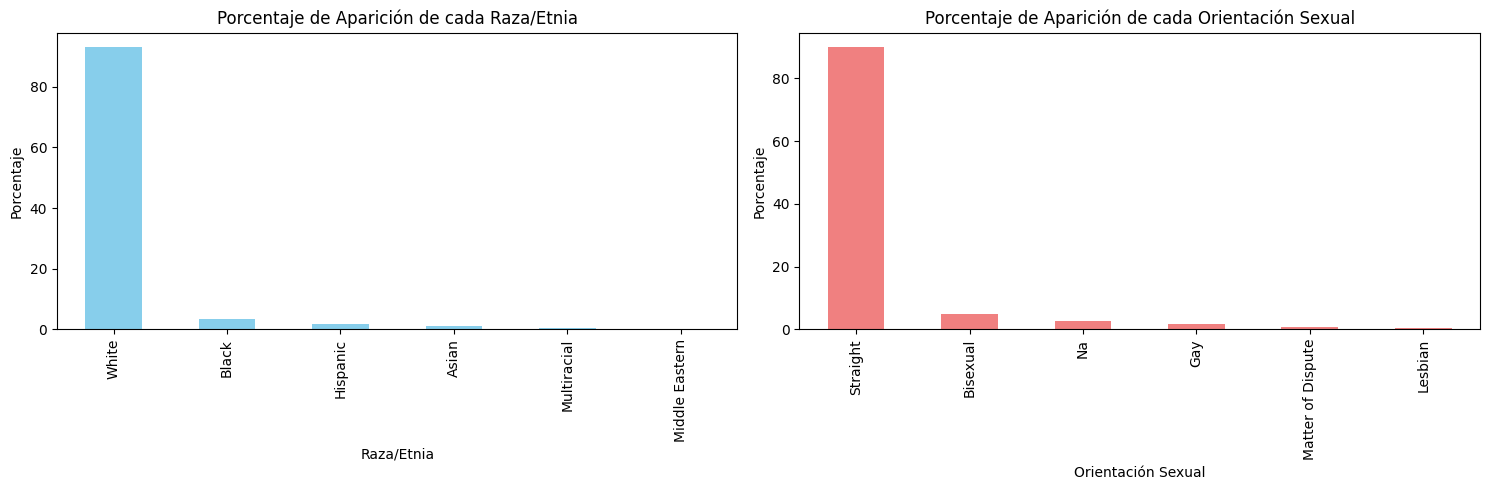

In [19]:
# Calcular el porcentaje de cada categoría de 'race_ethnicity'
race_ethnicity_percentage = df_clean['race_ethnicity'].value_counts(normalize=True) * 100

# Calcular el porcentaje de cada categoría de 'sexual_orientation'
sexual_orientation_percentage = df_clean['sexual_orientation'].value_counts(normalize=True) * 100

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar 'race_ethnicity'
race_ethnicity_percentage.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Porcentaje de Aparición de cada Raza/Etnia')
axes[0].set_xlabel('Raza/Etnia')
axes[0].set_ylabel('Porcentaje')

#Graficar 'sexual_orientation'
sexual_orientation_percentage.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Porcentaje de Aparición de cada Orientación Sexual')
axes[1].set_xlabel('Orientación Sexual')
axes[1].set_ylabel('Porcentaje')

# Ajustar diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

La graficación de estas 2 variables nos permite hacer un par de conclusiones tempranas:

- Falta de Representación: La predominancia de "White" y "Straight" indica que los galardonados en los premios Oscar, históricamente, han sido en su mayoría personas blancas y heterosexuales, lo cual sugiere una posible exclusión de personas de otras etnias y orientaciones sexuales.

- Necesidad de Inclusión Activa: Esta observación inicial subraya la importancia de desarrollar proyectos de inclusión que busquen balancear estas proporciones, promoviendo mayor representación de minorías étnicas y LGBTQ+ en roles destacados.

In [20]:
df_clean.head()

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,year_of_birth
0,"Chisinau, Moldova",White,Na,Straight,1927,Best Director,Two Arabian Knights,1895.0
1,"Glasgow, Scotland",White,Na,Straight,1930,Best Director,The Divine Lady,1886.0
2,"Chisinau, Moldova",White,Na,Straight,1931,Best Director,All Quiet on the Western Front,1895.0
3,"Chicago, Il",White,Na,Straight,1932,Best Director,Skippy,1899.0
4,"Salt Lake City, Ut",White,Roman Catholic,Straight,1933,Best Director,Bad Girl,1894.0


- Seleccionaremos las variables que serán relevantes para nuestro análisis.

- Luego, convertiremos las variables categóricas a numéricas con OneHotEncoder.

In [21]:
# Seleccionar las columnas relevantes para el análisis
oscars_df_filtered = df_clean[['year_of_birth', 'race_ethnicity', 'religion', 'sexual_orientation', 'award', 'year_of_award']]

# Aplicar one-hot encoding a las variables categóricas
oscars_df_encoded = pd.get_dummies(oscars_df_filtered, columns=['race_ethnicity', 'religion', 'sexual_orientation', 'award'])

# Mostrar las primeras filas del dataset codificado
oscars_df_encoded.head()


,year_of_birth,year_of_award,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,religion_Agnostic,religion_Anglican/episcopalian,...,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Na,sexual_orientation_Straight,award_Best Actor,award_Best Actress,award_Best Director,award_Best Supporting Actor,award_Best Supporting Actress
0,1895.0,1927,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,1886.0,1930,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
2,1895.0,1931,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1899.0,1932,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
4,1894.0,1933,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


- A continuación, haremos la división del conjunto de datos, en donde usamos 'race_ethnicity_White' como variable target en lugar de 'race_ethnicity' para simplificar el modelo en una especie de clasificación binaria ("White" vs. "no White").

- Hacemos esto porque facilita medir la inclusión de minorías. Dado el fuerte desequilibrio en la representación "White" en el dataset (90%), una clasificación multicategórica perdería precisión en minorías. Así, este enfoque nos permite identificar patrones de inclusión de manera más efectiva, enfocándonos en la brecha entre la mayoría y las minorías, y proporcionando una base útil para impulsar la diversidad en la industria.

In [22]:
# Definir las variables a usar y la variable objetivo (asumirla como clasificación binaria por simplicidad)
# Usar 'race_ethnicity_White' como señal de inclusión (mayoría vs minoría) como ejemplo
X = oscars_df_encoded.drop(columns=['race_ethnicity_White'])
y = oscars_df_encoded['race_ethnicity_White']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((352, 40), (89, 40))

- Nuestro resultado del split es 352 muestras para entrenamiento y 89 para prueba.

##Entrenamiento, evaluación, gráficas##

- Implementaremos el clasificador de bosques aleatorios (Ramdom Forest), porque es una excelente opción para clasificación debido a su alta precisión, robustez contra el sobreajuste, manejo de datos mixtos y capacidad de seleccionar automáticamente las características más importantes.

In [23]:
# Iniciar y entrenar un clasificador de bosques aleatorios
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

- Evaluaremos nuestro modelo usando la métrica de la exactitud (accuracy).

In [24]:
# Evaluar el kodelo usando accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


- El accuracy de nuestro modelo es de 1,0. Es decir, todas las predicciones fueron correctas.

- Este resultado puede tener algunas interpretaciones:
  
  - En la variable original 'race_ethnicity', nos dimos cuenta que la categoría "White" es abrumadoramente dominante. Por esta razón el modelo tiene tantos valores dentro de esa categoría, lo que puede resultar engañosa su alta precisión.

  - Sin embargo, si bien  un accuracy del 1,0 nos podría señalar sobreajuste del modelo, en este caso particular es un valor aceptable, ya que el dataset tiene un conjunto de datos pequeño.  

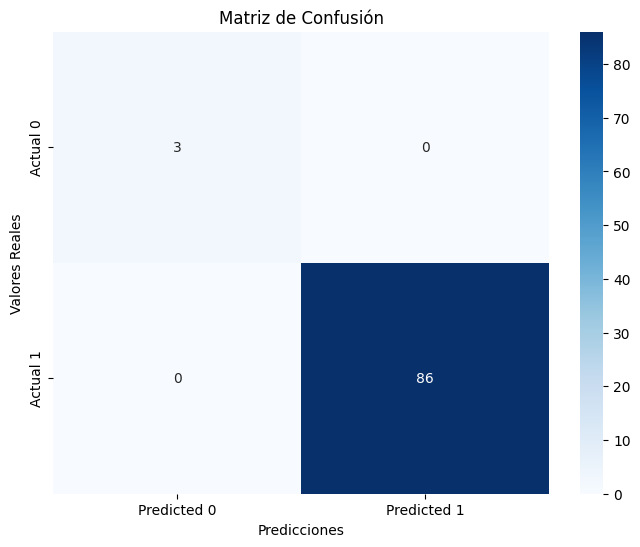

In [25]:
# Mapa de calor de la matriz de confusión

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

- El mapa de calor confirma el desbalanceo de 'race_ethnicity' original y de cualquier variable originada a partir de ella por la gran presencia de la categoría "White".